In [1]:
import pandas as pd

df = pd.read_csv("Film_DataSet.csv")

df.head()
print (df)

                                        Movie_Title  Year  \
0                                           Kantara  2022   
1                                   The Dark Knight  2008   
2     The Lord of the Rings: The Return of the King  2003   
3                                         Inception  2010   
4             The Lord of the Rings: The Two Towers  2002   
...                                             ...   ...   
5557                                 Disaster Movie  2008   
5558                        The Hottie & the Nottie  2008   
5559                           From Justin to Kelly  2003   
5560                   Superbabies: Baby Geniuses 2  2004   
5561                 Cumali Ceber: Allah Seni Alsin  2017   

                                      Director  \
0                                Rishab Shetty   
1                            Christopher Nolan   
2                                Peter Jackson   
3                            Christopher Nolan   
4                

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5562 entries, 0 to 5561
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Movie_Title    5562 non-null   object 
 1   Year           5562 non-null   int64  
 2   Director       5562 non-null   object 
 3   Actors         5562 non-null   object 
 4   Rating         5562 non-null   float64
 5   Runtime(Mins)  5562 non-null   int64  
 6   Censor         5562 non-null   object 
 7   Total_Gross    5562 non-null   object 
 8   main_genre     5562 non-null   object 
 9   side_genre     5562 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 434.7+ KB


## Exploration EDA

In [3]:
df.shape

(5562, 10)

In [4]:
df.columns

Index(['Movie_Title', 'Year', 'Director', 'Actors', 'Rating', 'Runtime(Mins)',
       'Censor', 'Total_Gross', 'main_genre', 'side_genre'],
      dtype='object')

## les valeurs manquantes

In [5]:
df.isna().sum()


Movie_Title      0
Year             0
Director         0
Actors           0
Rating           0
Runtime(Mins)    0
Censor           0
Total_Gross      0
main_genre       0
side_genre       0
dtype: int64

## pas de valeurs manquantes 

Decription de valeur descriptive

In [6]:
df.describe()

,Year,Rating,Runtime(Mins)
count,5562.000000,5562.000000,5562.000000
mean,2002.792521,6.755861,112.226717
std,16.143990,0.937133,21.612655
min,1920.000000,1.000000,45.000000
25%,1997.000000,6.200000,97.000000
50%,2007.000000,6.800000,108.000000
75%,2014.000000,7.400000,123.000000
max,2022.000000,9.300000,321.000000


## description des variables textuelles

In [7]:
df['main_genre'].value_counts()


main_genre
Action       1577
Comedy       1350
Drama        1027
Crime         447
Biography     355
Animation     321
Adventure     296
Horror        142
Mystery        26
Fantasy        13
Western         4
Film-Noir       3
Musical         1
Name: count, dtype: int64

In [8]:
df['side_genre'].value_counts()


side_genre
Drama,  Romance       324
Drama                 312
Adventure,  Comedy    307
Crime,  Drama         306
Romance               305
                     ... 
Fantasy,  Sport         1
Comedy,  Film-Noir      1
Music,  Thriller        1
Comedy,  Musical        1
Fantasy,  Musical       1
Name: count, Length: 144, dtype: int64

In [9]:
df['Movie_Title'].value_counts()


Movie_Title
Robin Hood                      3
Cinderella                      3
Taxi                            3
Dracula                         3
War                             2
                               ..
Disaster Movie                  1
The Hottie & the Nottie         1
From Justin to Kelly            1
Superbabies: Baby Geniuses 2    1
Movie 43                        1
Name: count, Length: 5453, dtype: int64

In [10]:
categorical_cols = df.select_dtypes(include=['object']).columns

print("Colonnes catégorielles détectées :")
for col in categorical_cols:
    print(f"- {col}")
print("\nNombre de valeurs uniques :")
for col in categorical_cols:
    print(f"{col} : {df[col].nunique()}")

Colonnes catégorielles détectées :
- Movie_Title
- Director
- Actors
- Censor
- Total_Gross
- main_genre
- side_genre

Nombre de valeurs uniques :
Movie_Title : 5453
Director : 2320
Actors : 5511
Censor : 25
Total_Gross : 3501
main_genre : 13
side_genre : 144


In [11]:
df.head(5)
df.shape
df.columns.tolist()


['Movie_Title',
 'Year',
 'Director',
 'Actors',
 'Rating',
 'Runtime(Mins)',
 'Censor',
 'Total_Gross',
 'main_genre',
 'side_genre']

In [12]:
print(df[['Movie_Title', 'main_genre', 'side_genre', 'Actors', 'Director', 'Rating']].head(10))

                                         Movie_Title main_genre  \
0                                            Kantara     Action   
1                                    The Dark Knight     Action   
2      The Lord of the Rings: The Return of the King     Action   
3                                          Inception     Action   
4              The Lord of the Rings: The Two Towers     Action   
5  The Lord of the Rings: The Fellowship of the Ring     Action   
6                                         The Matrix     Action   
7                            The Empire Strikes Back     Action   
8                         Terminator 2: Judgment Day     Action   
9                                          Star Wars     Action   

             side_genre                                             Actors  \
0     Adventure,  Drama  Rishab Shetty, Sapthami Gowda, Kishore Kumar G...   
1         Crime,  Drama  Christian Bale, Heath Ledger, Aaron Eckhart, M...   
2     Adventure,  Drama  Eli

## Analyse exploratoire 
# variables numérique

In [13]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Distribution des Années

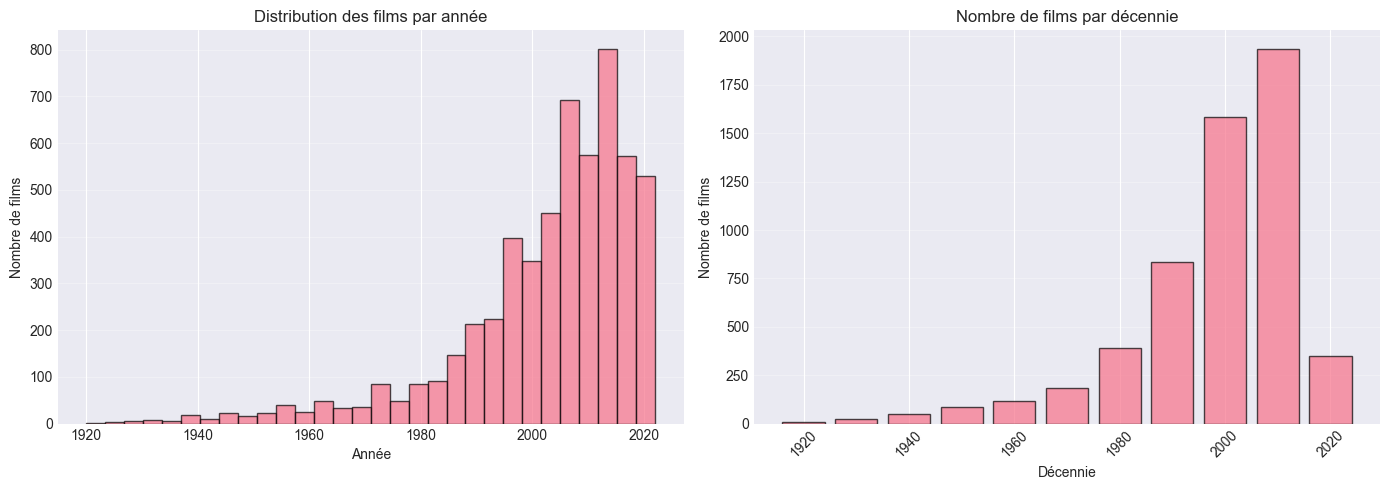

Période couverte : 1920 - 2022

Top 5 années avec le plus de films :
Year
2014    216
2013    210
2011    198
2016    197
2018    195
Name: count, dtype: int64


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.hist(df['Year'], bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Année')
plt.ylabel('Nombre de films')
plt.title('Distribution des films par année')
plt.grid(axis='y', alpha=0.3)

plt.subplot(1, 2, 2)
df['Decade'] = (df['Year'] // 10) * 10
decade_counts = df['Decade'].value_counts().sort_index()
plt.bar(decade_counts.index, decade_counts.values, width=8, edgecolor='black', alpha=0.7)
plt.xlabel('Décennie')
plt.ylabel('Nombre de films')
plt.title('Nombre de films par décennie')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Période couverte : {df['Year'].min()} - {df['Year'].max()}")
print(f"\nTop 5 années avec le plus de films :")
print(df['Year'].value_counts().head())

Distribution des Notes

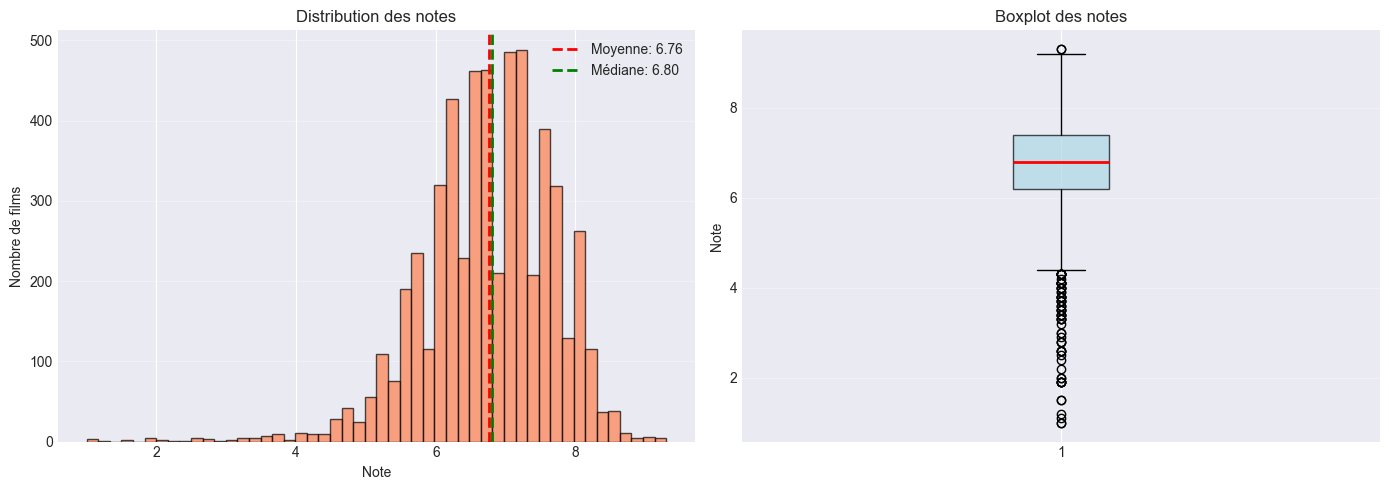

=== STATISTIQUES DES NOTES ===
Note moyenne : 6.76
Note médiane : 6.80
Écart-type : 0.94
Note min : 1.0
Note max : 9.3

Nombre de films par tranche de note :
  Excellents (≥8.0) : 478
  Bons (7.0-7.9) : 2017
  Moyens (6.0-6.9) : 2111
  Faibles (<6.0) : 956


In [15]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.hist(df['Rating'], bins=50, edgecolor='black', alpha=0.7, color='coral')
plt.xlabel('Note')
plt.ylabel('Nombre de films')
plt.title('Distribution des notes')
plt.axvline(df['Rating'].mean(), color='red', linestyle='--', linewidth=2, label=f'Moyenne: {df["Rating"].mean():.2f}')
plt.axvline(df['Rating'].median(), color='green', linestyle='--', linewidth=2, label=f'Médiane: {df["Rating"].median():.2f}')
plt.legend()
plt.grid(axis='y', alpha=0.3)

plt.subplot(1, 2, 2)
plt.boxplot(df['Rating'], vert=True, patch_artist=True, 
            boxprops=dict(facecolor='lightblue', alpha=0.7),
            medianprops=dict(color='red', linewidth=2))
plt.ylabel('Note')
plt.title('Boxplot des notes')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Statistiques détaillées
print("=== STATISTIQUES DES NOTES ===")
print(f"Note moyenne : {df['Rating'].mean():.2f}")
print(f"Note médiane : {df['Rating'].median():.2f}")
print(f"Écart-type : {df['Rating'].std():.2f}")
print(f"Note min : {df['Rating'].min()}")
print(f"Note max : {df['Rating'].max()}")
print(f"\nNombre de films par tranche de note :")
print(f"  Excellents (≥8.0) : {len(df[df['Rating'] >= 8.0])}")
print(f"  Bons (7.0-7.9) : {len(df[(df['Rating'] >= 7.0) & (df['Rating'] < 8.0)])}")
print(f"  Moyens (6.0-6.9) : {len(df[(df['Rating'] >= 6.0) & (df['Rating'] < 7.0)])}")
print(f"  Faibles (<6.0) : {len(df[df['Rating'] < 6.0])}")

Distribution de la Durée du film

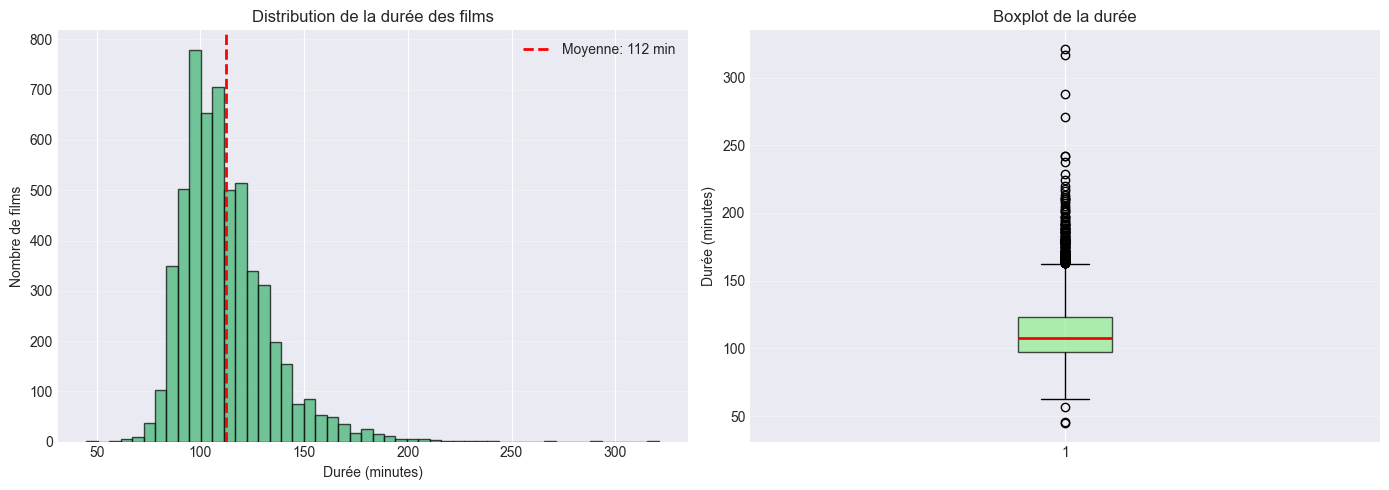

=== STATISTIQUES DE DURÉE ===
Durée moyenne : 112 minutes
Durée médiane : 108 minutes
Durée min : 45 minutes
Durée max : 321 minutes

Films les plus longs :
                       Movie_Title  Runtime(Mins)  Year
41              Gangs of Wasseypur            321  2012
2941                     Novecento            317  1976
331                         Chi bi            288  2008
2945                    Gettysburg            271  1993
86    Zack Snyder's Justice League            242  2021


In [16]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.hist(df['Runtime(Mins)'], bins=50, edgecolor='black', alpha=0.7, color='mediumseagreen')
plt.xlabel('Durée (minutes)')
plt.ylabel('Nombre de films')
plt.title('Distribution de la durée des films')
plt.axvline(df['Runtime(Mins)'].mean(), color='red', linestyle='--', linewidth=2, 
            label=f'Moyenne: {df["Runtime(Mins)"].mean():.0f} min')
plt.legend()
plt.grid(axis='y', alpha=0.3)

plt.subplot(1, 2, 2)
plt.boxplot(df['Runtime(Mins)'], vert=True, patch_artist=True,
            boxprops=dict(facecolor='lightgreen', alpha=0.7),
            medianprops=dict(color='red', linewidth=2))
plt.ylabel('Durée (minutes)')
plt.title('Boxplot de la durée')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


print("=== STATISTIQUES DE DURÉE ===")
print(f"Durée moyenne : {df['Runtime(Mins)'].mean():.0f} minutes")
print(f"Durée médiane : {df['Runtime(Mins)'].median():.0f} minutes")
print(f"Durée min : {df['Runtime(Mins)'].min()} minutes")
print(f"Durée max : {df['Runtime(Mins)'].max()} minutes")
print(f"\nFilms les plus longs :")
print(df.nlargest(5, 'Runtime(Mins)')[['Movie_Title', 'Runtime(Mins)', 'Year']])

Analyse des Genres

## genres principaux (main_genre)

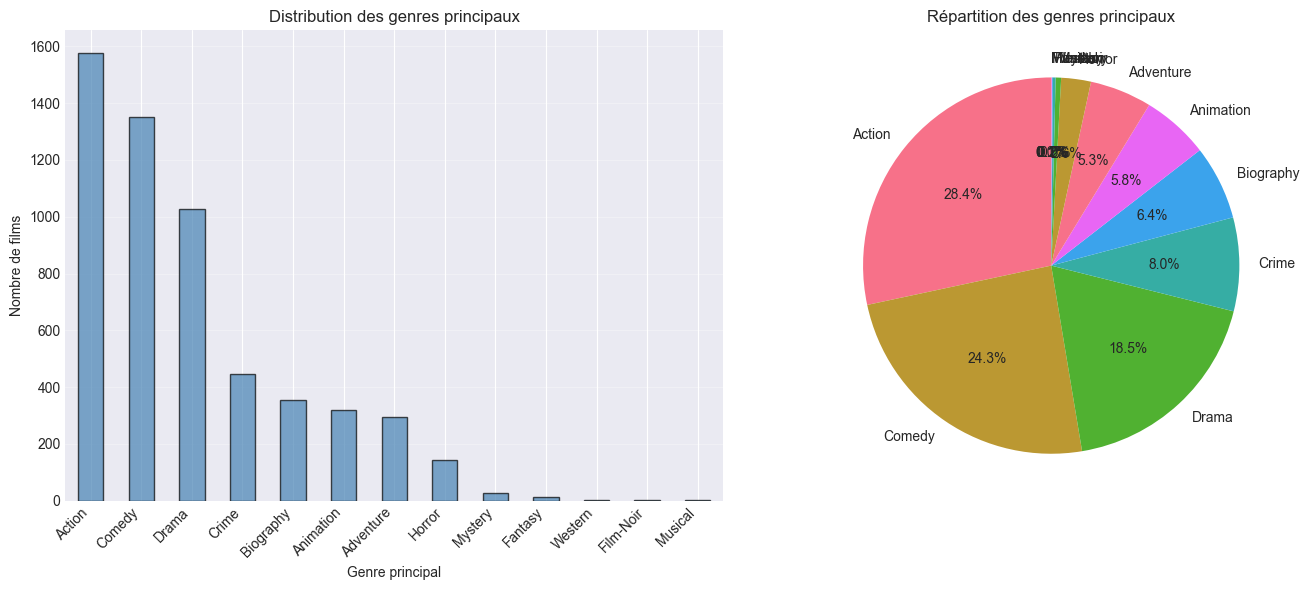

=== GENRES PRINCIPAUX ===
main_genre
Action       1577
Comedy       1350
Drama        1027
Crime         447
Biography     355
Animation     321
Adventure     296
Horror        142
Mystery        26
Fantasy        13
Western         4
Film-Noir       3
Musical         1
Name: count, dtype: int64

Total de genres différents : 13


In [17]:


plt.figure(figsize=(14, 6))

genre_counts = df['main_genre'].value_counts()


plt.subplot(1, 2, 1)
genre_counts.plot(kind='bar', color='steelblue', edgecolor='black', alpha=0.7)
plt.xlabel('Genre principal')
plt.ylabel('Nombre de films')
plt.title('Distribution des genres principaux')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

plt.subplot(1, 2, 2)
plt.pie(genre_counts.values, labels=genre_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Répartition des genres principaux')

plt.tight_layout()
plt.show()

print("=== GENRES PRINCIPAUX ===")
print(genre_counts)
print(f"\nTotal de genres différents : {df['main_genre'].nunique()}")

Tous les Genres (main + side)

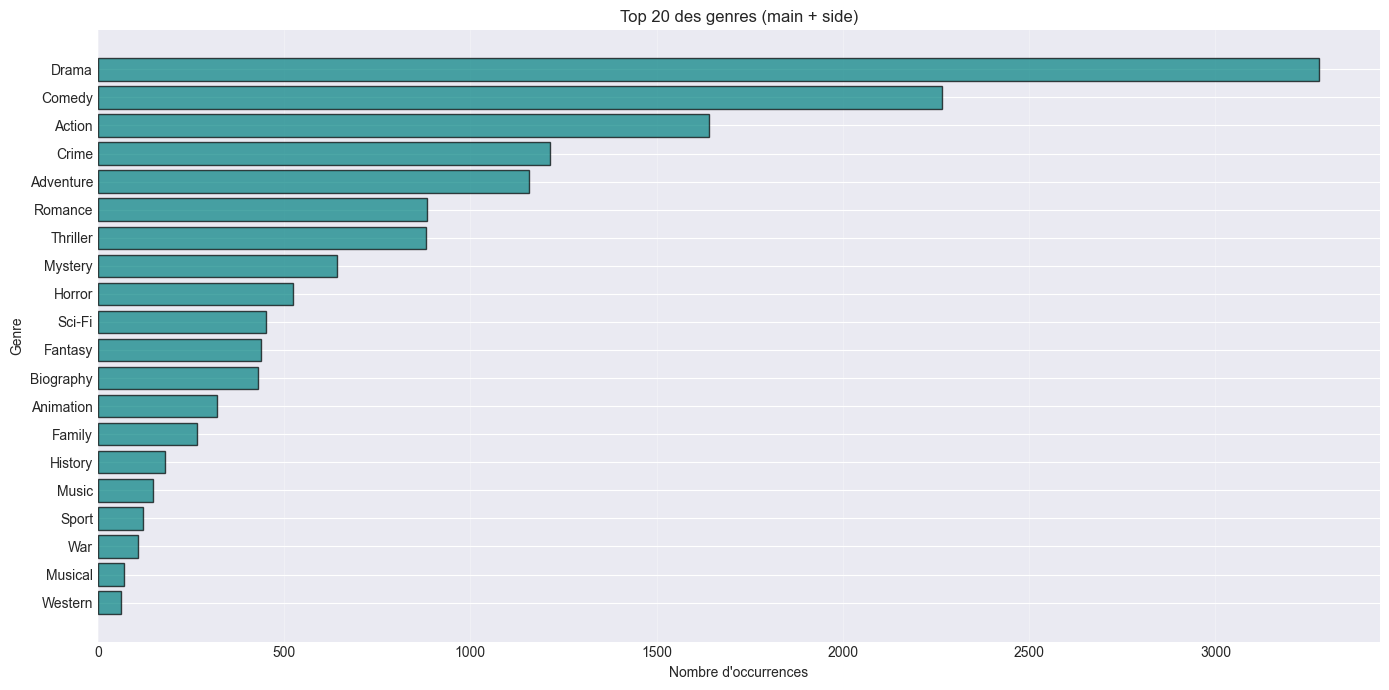

=== TOP 20 DES GENRES (TOUS) ===
        Genre  Count
0       Drama   3278
1      Comedy   2265
2      Action   1641
3       Crime   1214
4   Adventure   1156
5     Romance    883
6    Thriller    880
7     Mystery    643
8      Horror    524
9      Sci-Fi    450
10    Fantasy    438
11  Biography    429
12  Animation    321
13     Family    265
14    History    180
15      Music    149
16      Sport    122
17        War    107
18    Musical     69
19    Western     61

Total de genres uniques : 22


In [18]:



from typing import Counter


all_genres = []


all_genres.extend(df['main_genre'].tolist())


for side in df['side_genre']:
    if pd.notna(side) and side.strip():  
        genres = [g.strip() for g in side.split(',')]
        all_genres.extend(genres)


genre_counter = Counter(all_genres)
genre_df = pd.DataFrame(genre_counter.most_common(20), columns=['Genre', 'Count'])


plt.figure(figsize=(14, 7))
plt.barh(genre_df['Genre'], genre_df['Count'], color='teal', edgecolor='black', alpha=0.7)
plt.xlabel('Nombre d\'occurrences')
plt.ylabel('Genre')
plt.title('Top 20 des genres (main + side)')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("=== TOP 20 DES GENRES (TOUS) ===")
print(genre_df)
print(f"\nTotal de genres uniques : {len(genre_counter)}")

Analyse des combinaisons de genres

In [19]:


print("=== COMBINAISONS DE GENRES SECONDAIRES ===")
print(f"Nombre de combinaisons uniques : {df['side_genre'].nunique()}")
print(f"\nTop 10 des combinaisons :")
print(df['side_genre'].value_counts().head(10))

=== COMBINAISONS DE GENRES SECONDAIRES ===
Nombre de combinaisons uniques : 144

Top 10 des combinaisons :
side_genre
 Drama,  Romance       324
 Drama                 312
 Adventure,  Comedy    307
 Crime,  Drama         306
 Romance               305
Drama                  196
 Drama,  Thriller      195
 Mystery,  Thriller    175
 Thriller              166
Comedy                 162
Name: count, dtype: int64


 Analyse des Acteurs et Réalisateurs


Réalisateurs les plus prolifiques

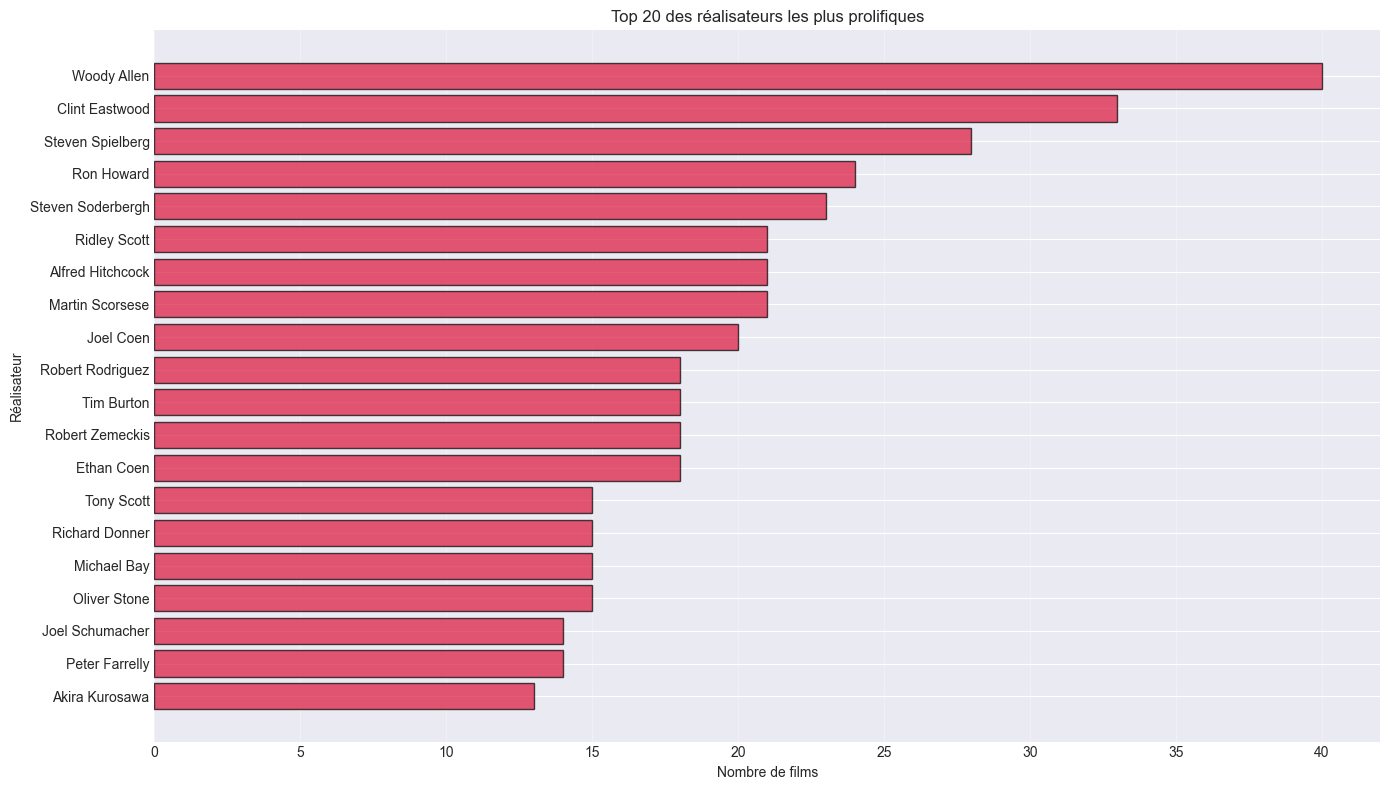

=== TOP 20 RÉALISATEURS ===
             Director  Count
0         Woody Allen     40
1      Clint Eastwood     33
2    Steven Spielberg     28
3          Ron Howard     24
4   Steven Soderbergh     23
5        Ridley Scott     21
6    Alfred Hitchcock     21
7     Martin Scorsese     21
8           Joel Coen     20
9    Robert Rodriguez     18
10         Tim Burton     18
11    Robert Zemeckis     18
12         Ethan Coen     18
13         Tony Scott     15
14     Richard Donner     15
15        Michael Bay     15
16       Oliver Stone     15
17    Joel Schumacher     14
18     Peter Farrelly     14
19     Akira Kurosawa     13


In [20]:



directors_clean = df['Director'].str.replace('Directors:', '', regex=False).str.strip()


all_directors = []
for director in directors_clean:
    if pd.notna(director):
        dirs = [d.strip() for d in director.split(',')]
        all_directors.extend(dirs)

director_counter = Counter(all_directors)
top_directors = pd.DataFrame(director_counter.most_common(20), columns=['Director', 'Count'])

plt.figure(figsize=(14, 8))
plt.barh(top_directors['Director'], top_directors['Count'], color='crimson', edgecolor='black', alpha=0.7)
plt.xlabel('Nombre de films')
plt.ylabel('Réalisateur')
plt.title('Top 20 des réalisateurs les plus prolifiques')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("=== TOP 20 RÉALISATEURS ===")
print(top_directors)

Meilleurs réalisateurs (note moyenne, min 3 films)

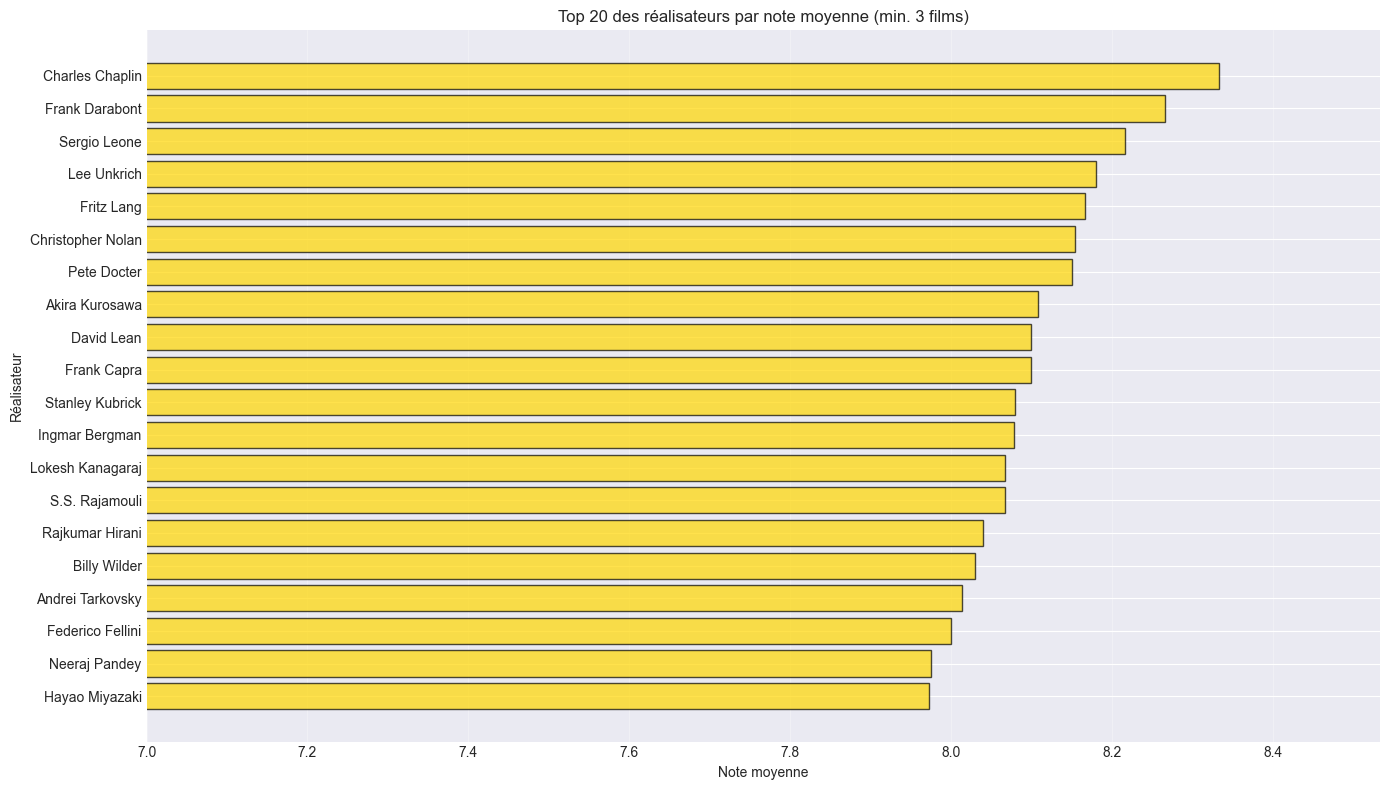

=== TOP 20 RÉALISATEURS (MEILLEURE NOTE) ===
         Director  Avg_Rating  Nb_Films
  Charles Chaplin    8.333333         6
   Frank Darabont    8.266667         3
     Sergio Leone    8.216667         6
      Lee Unkrich    8.180000         5
       Fritz Lang    8.166667         3
Christopher Nolan    8.154545        11
      Pete Docter    8.150000         4
   Akira Kurosawa    8.107692        13
       David Lean    8.100000         4
      Frank Capra    8.100000         5
  Stanley Kubrick    8.080000        10
   Ingmar Bergman    8.077778         9
 Lokesh Kanagaraj    8.066667         3
   S.S. Rajamouli    8.066667         3
  Rajkumar Hirani    8.040000         5
     Billy Wilder    8.030000        10
 Andrei Tarkovsky    8.014286         7
 Federico Fellini    8.000000         5
    Neeraj Pandey    7.975000         4
   Hayao Miyazaki    7.972727        11


In [21]:

director_ratings = []
for idx, row in df.iterrows():
    director_clean = row['Director'].replace('Directors:', '').strip()
    directors = [d.strip() for d in director_clean.split(',')]
    for director in directors:
        if director:
            director_ratings.append({
                'Director': director,
                'Rating': row['Rating']
            })

director_df = pd.DataFrame(director_ratings)


director_stats = director_df.groupby('Director').agg({
    'Rating': ['mean', 'count']
}).reset_index()
director_stats.columns = ['Director', 'Avg_Rating', 'Nb_Films']


director_stats = director_stats[director_stats['Nb_Films'] >= 3]
top_rated_directors = director_stats.nlargest(20, 'Avg_Rating')

plt.figure(figsize=(14, 8))
plt.barh(top_rated_directors['Director'], top_rated_directors['Avg_Rating'], 
         color='gold', edgecolor='black', alpha=0.7)
plt.xlabel('Note moyenne')
plt.ylabel('Réalisateur')
plt.title('Top 20 des réalisateurs par note moyenne (min. 3 films)')
plt.gca().invert_yaxis()
plt.xlim(7, top_rated_directors['Avg_Rating'].max() + 0.2)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("=== TOP 20 RÉALISATEURS (MEILLEURE NOTE) ===")
print(top_rated_directors.to_string(index=False))

Acteurs les plus présents

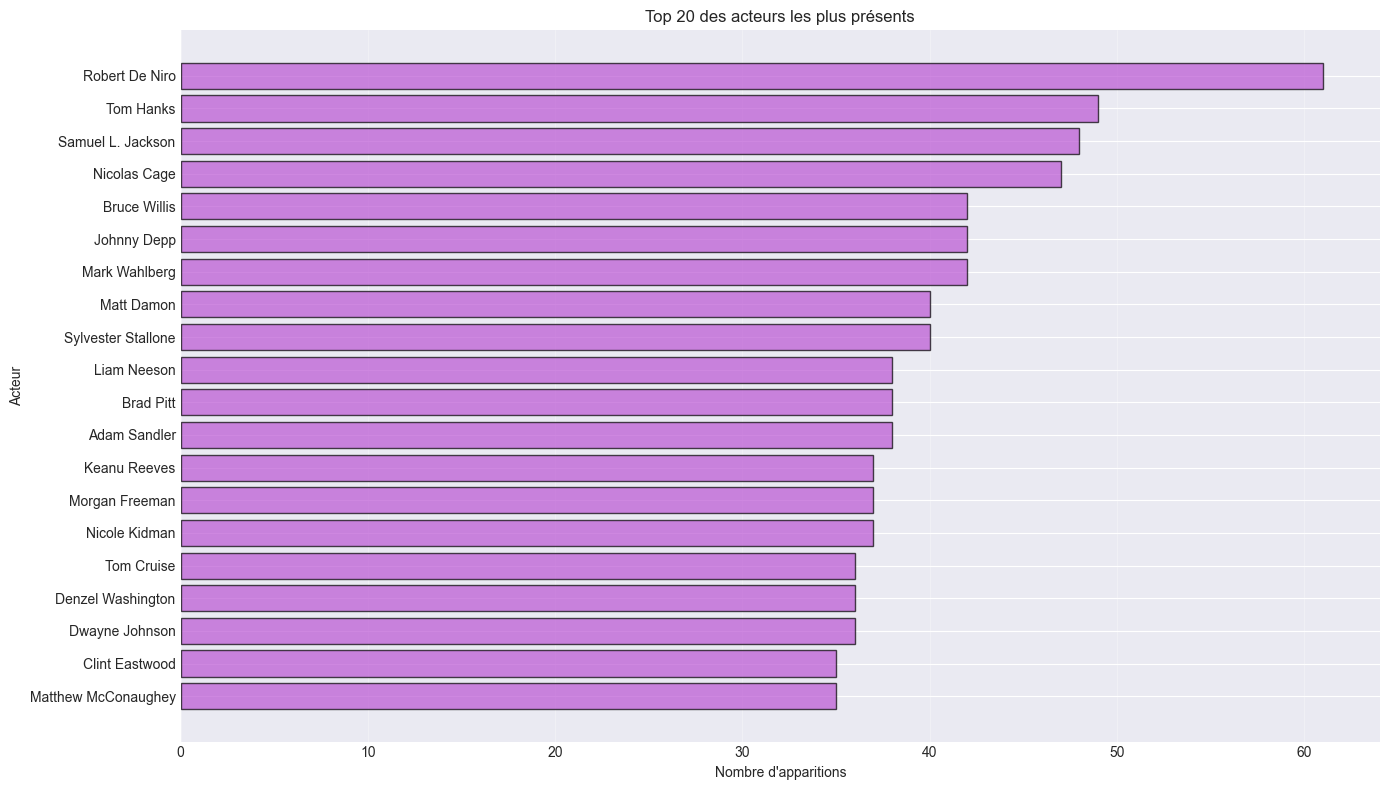

=== TOP 20 ACTEURS ===
                  Actor  Count
0        Robert De Niro     61
1             Tom Hanks     49
2     Samuel L. Jackson     48
3          Nicolas Cage     47
4          Bruce Willis     42
5           Johnny Depp     42
6         Mark Wahlberg     42
7            Matt Damon     40
8    Sylvester Stallone     40
9           Liam Neeson     38
10            Brad Pitt     38
11         Adam Sandler     38
12         Keanu Reeves     37
13       Morgan Freeman     37
14        Nicole Kidman     37
15           Tom Cruise     36
16    Denzel Washington     36
17       Dwayne Johnson     36
18       Clint Eastwood     35
19  Matthew McConaughey     35


In [22]:



all_actors = []
for actors in df['Actors']:
    if pd.notna(actors):
        actor_list = [a.strip() for a in actors.split(',')]
        all_actors.extend(actor_list[:5])  

actor_counter = Counter(all_actors)
top_actors = pd.DataFrame(actor_counter.most_common(20), columns=['Actor', 'Count'])

plt.figure(figsize=(14, 8))
plt.barh(top_actors['Actor'], top_actors['Count'], color='mediumorchid', edgecolor='black', alpha=0.7)
plt.xlabel('Nombre d\'apparitions')
plt.ylabel('Acteur')
plt.title('Top 20 des acteurs les plus présents')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("=== TOP 20 ACTEURS ===")
print(top_actors)

Analyse Temporelle

Évolution du nombre de films par année

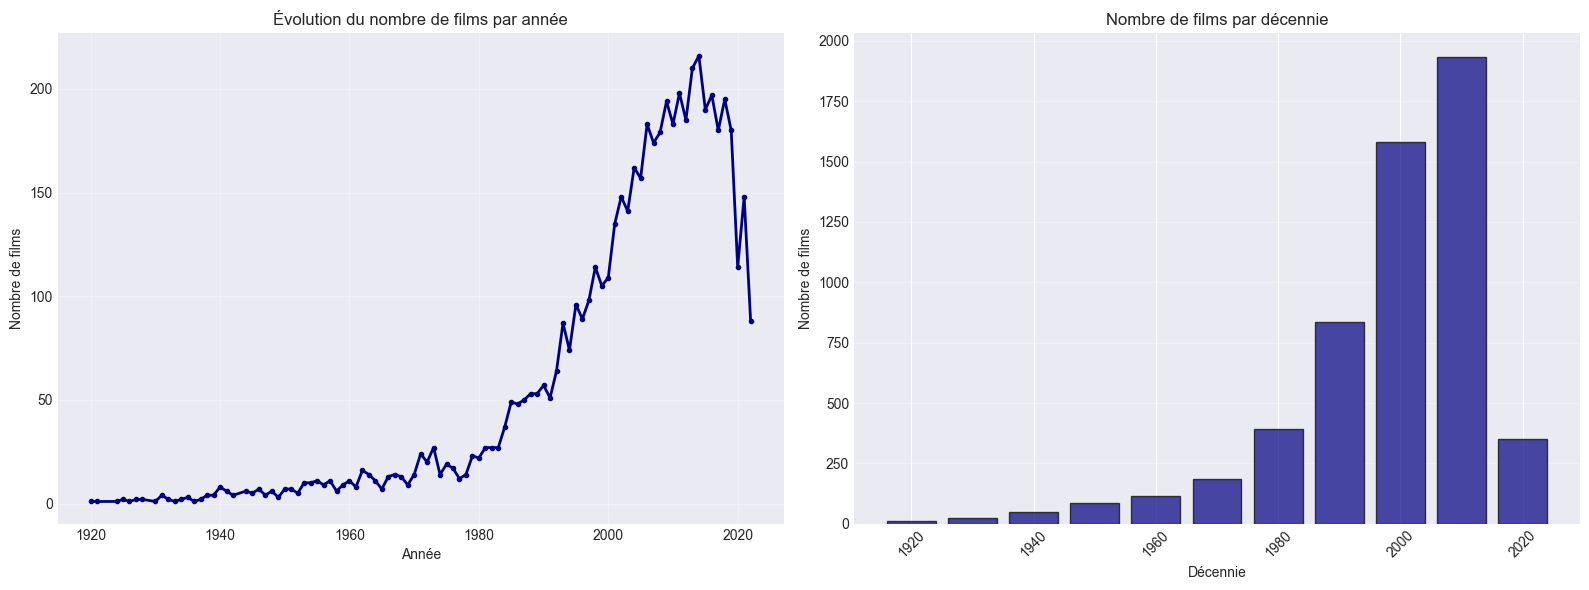

=== ÉVOLUTION DE LA PRODUCTION ===
Pic de production : 2014 avec 216 films


In [23]:
films_per_year = df['Year'].value_counts().sort_index()

plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.plot(films_per_year.index, films_per_year.values, linewidth=2, color='navy', marker='o', markersize=3)
plt.xlabel('Année')
plt.ylabel('Nombre de films')
plt.title('Évolution du nombre de films par année')
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
films_per_decade = df['Decade'].value_counts().sort_index()
plt.bar(films_per_decade.index, films_per_decade.values, width=8, color='navy', edgecolor='black', alpha=0.7)
plt.xlabel('Décennie')
plt.ylabel('Nombre de films')
plt.title('Nombre de films par décennie')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("=== ÉVOLUTION DE LA PRODUCTION ===")
print(f"Pic de production : {films_per_year.idxmax()} avec {films_per_year.max()} films")

Évolution des notes au fil du temps

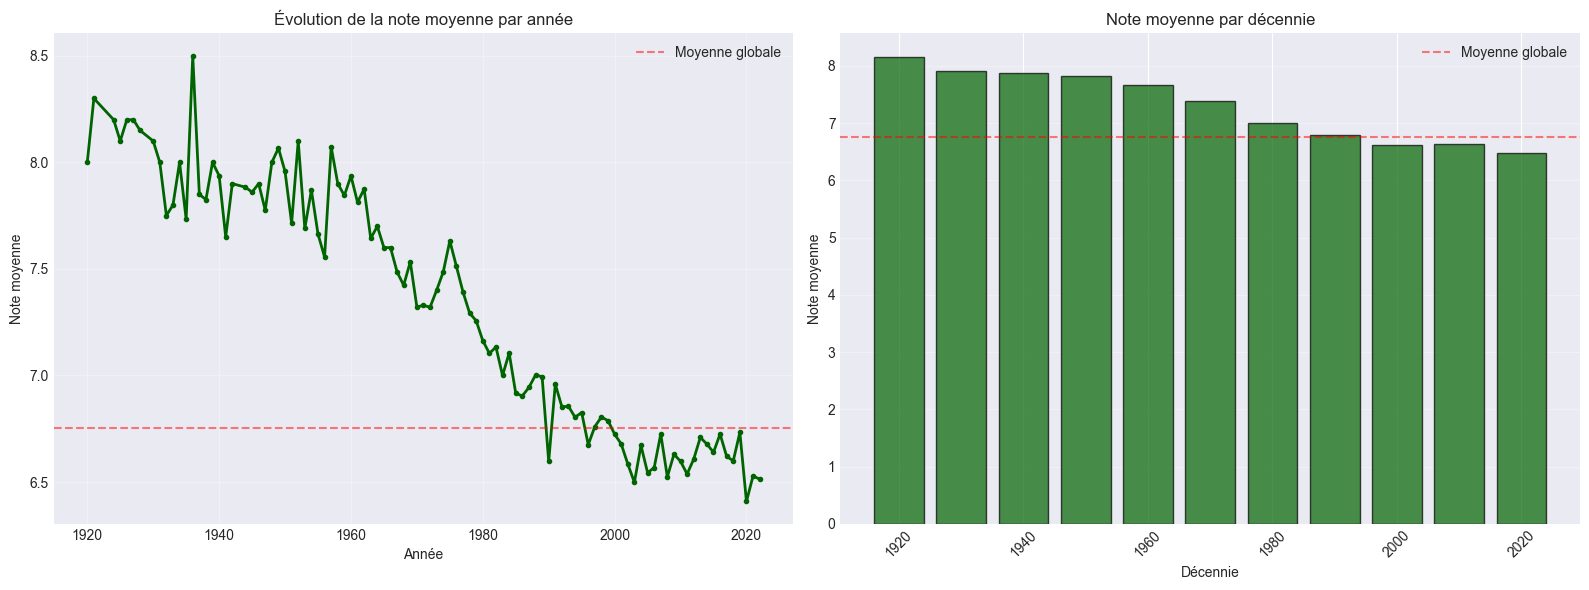

=== ÉVOLUTION DES NOTES ===
Note moyenne par décennie :
Decade
1920    8.160000
1930    7.920833
1940    7.881633
1950    7.822353
1960    7.660345
1970    7.390217
1980    7.005598
1990    6.790180
2000    6.611694
2010    6.645398
2020    6.485714
Name: Rating, dtype: float64


In [24]:
rating_by_year = df.groupby('Year')['Rating'].mean()
rating_by_decade = df.groupby('Decade')['Rating'].mean()

plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.plot(rating_by_year.index, rating_by_year.values, linewidth=2, color='darkgreen', marker='o', markersize=3)
plt.xlabel('Année')
plt.ylabel('Note moyenne')
plt.title('Évolution de la note moyenne par année')
plt.axhline(df['Rating'].mean(), color='red', linestyle='--', alpha=0.5, label='Moyenne globale')
plt.legend()
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
plt.bar(rating_by_decade.index, rating_by_decade.values, width=8, color='darkgreen', edgecolor='black', alpha=0.7)
plt.xlabel('Décennie')
plt.ylabel('Note moyenne')
plt.title('Note moyenne par décennie')
plt.axhline(df['Rating'].mean(), color='red', linestyle='--', alpha=0.5, label='Moyenne globale')
plt.legend()
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("=== ÉVOLUTION DES NOTES ===")
print("Note moyenne par décennie :")
print(rating_by_decade.sort_index())

Genres populaires par décennie
Quels genres dominaient à chaque époque ?

<Figure size 1600x800 with 0 Axes>

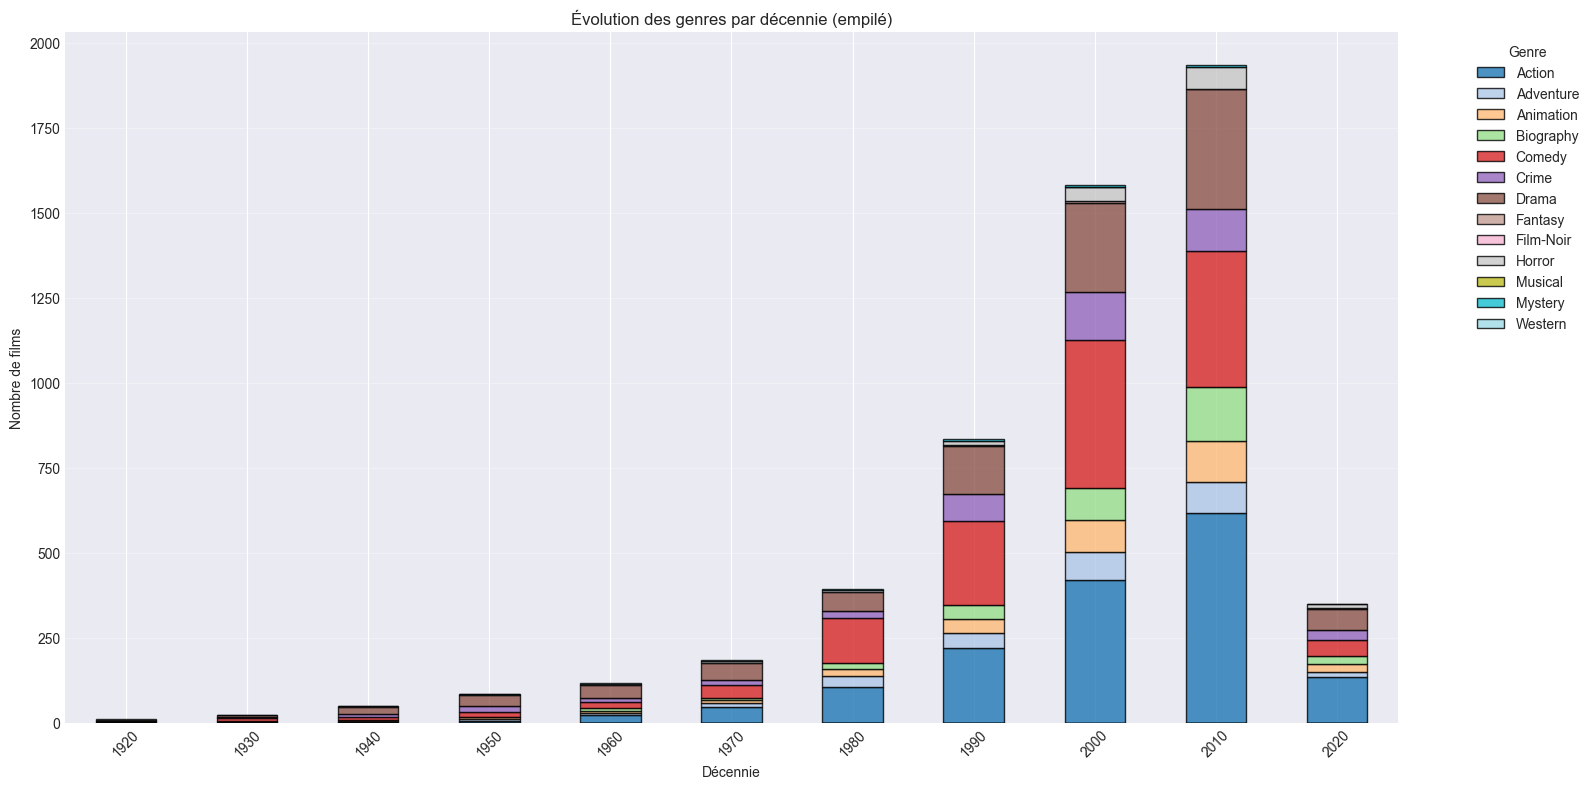

=== TOP 3 GENRES PAR DÉCENNIE ===

1920s :
  Drama: 3 films
  Action: 2 films
  Comedy: 2 films

1930s :
  Comedy: 10 films
  Drama: 7 films
  Action: 2 films

1940s :
  Drama: 19 films
  Crime: 9 films
  Comedy: 8 films

1950s :
  Drama: 33 films
  Crime: 16 films
  Comedy: 14 films

1960s :
  Drama: 40 films
  Action: 23 films
  Comedy: 19 films

1970s :
  Drama: 49 films
  Action: 45 films
  Comedy: 37 films

1980s :
  Comedy: 130 films
  Action: 105 films
  Drama: 55 films

1990s :
  Comedy: 249 films
  Action: 221 films
  Drama: 141 films

2000s :
  Comedy: 434 films
  Action: 419 films
  Drama: 263 films

2010s :
  Action: 618 films
  Comedy: 399 films
  Drama: 353 films

2020s :
  Action: 136 films
  Drama: 64 films
  Comedy: 48 films


In [25]:
genre_by_decade = df.groupby(['Decade', 'main_genre']).size().reset_index(name='Count')

top_genres_per_decade = genre_by_decade.sort_values(['Decade', 'Count'], ascending=[True, False])
top_genres_per_decade = top_genres_per_decade.groupby('Decade').head(3)

pivot_data = genre_by_decade.pivot(index='Decade', columns='main_genre', values='Count').fillna(0)

plt.figure(figsize=(16, 8))
pivot_data.plot(kind='bar', stacked=True, figsize=(16, 8), colormap='tab20', edgecolor='black', alpha=0.8)
plt.xlabel('Décennie')
plt.ylabel('Nombre de films')
plt.title('Évolution des genres par décennie (empilé)')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("=== TOP 3 GENRES PAR DÉCENNIE ===")
for decade in sorted(df['Decade'].unique()):
    print(f"\n{decade}s :")
    decade_data = top_genres_per_decade[top_genres_per_decade['Decade'] == decade]
    for idx, row in decade_data.iterrows():
        print(f"  {row['main_genre']}: {row['Count']} films")

 Analyse des Meilleurs Films

Top 20 des films par note

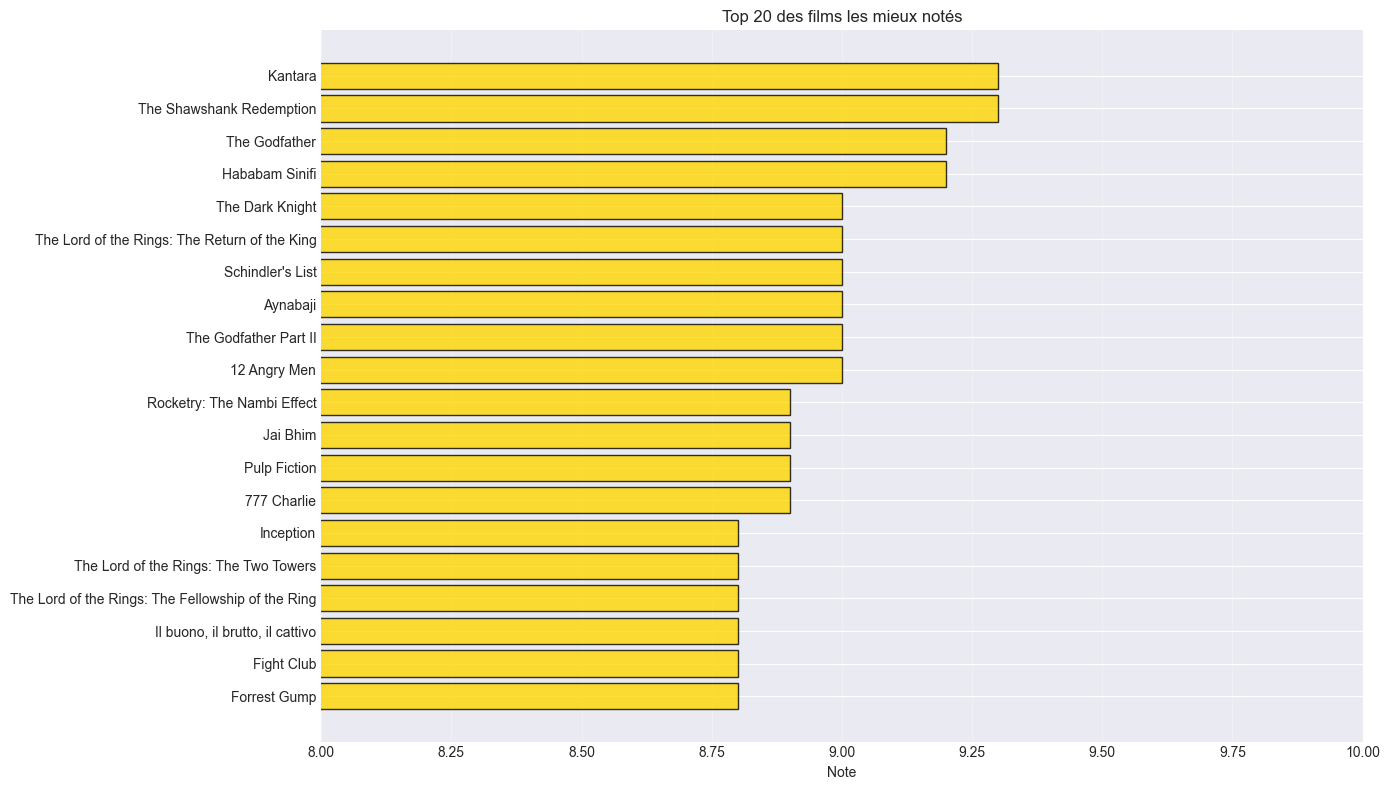

=== TOP 20 DES MEILLEURS FILMS ===
                                      Movie_Title  Year               Director  Rating main_genre  Runtime(Mins)
                                          Kantara  2022          Rishab Shetty     9.3     Action            148
                         The Shawshank Redemption  1994         Frank Darabont     9.3      Drama            142
                                    The Godfather  1972   Francis Ford Coppola     9.2      Crime            175
                                   Hababam Sinifi  1975          Ertem Egilmez     9.2     Comedy             87
                                  The Dark Knight  2008      Christopher Nolan     9.0     Action            152
    The Lord of the Rings: The Return of the King  2003          Peter Jackson     9.0     Action            201
                                 Schindler's List  1993       Steven Spielberg     9.0  Biography            195
                                         Aynabaji  2016 Amita

In [26]:
top_movies = df.nlargest(20, 'Rating')[['Movie_Title', 'Year', 'Director', 'Rating', 'main_genre', 'Runtime(Mins)']]

plt.figure(figsize=(14, 8))
plt.barh(range(len(top_movies)), top_movies['Rating'], color='gold', edgecolor='black', alpha=0.8)
plt.yticks(range(len(top_movies)), top_movies['Movie_Title'])
plt.xlabel('Note')
plt.title('Top 20 des films les mieux notés')
plt.gca().invert_yaxis()
plt.xlim(8, 10)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("=== TOP 20 DES MEILLEURS FILMS ===")
print(top_movies.to_string(index=False))

Caractéristiques des films très bien notés
Quels genres, durées, années caractérisent les films avec note ≥ 8.0 ?

=== FILMS EXCELLENTS (note ≥ 8.0) : 478 films ===

Genres principaux :
main_genre
Drama        148
Action        95
Crime         58
Comedy        57
Biography     42
Animation     38
Adventure     26
Mystery        7
Western        3
Horror         3
Name: count, dtype: int64

Durée moyenne : 131 minutes
Durée médiane : 128 minutes

Année moyenne : 1990
Répartition par décennie :
Decade
1920     10
1930      8
1940     20
1950     40
1960     37
1970     35
1980     40
1990     66
2000     84
2010    109
2020     29
Name: count, dtype: int64


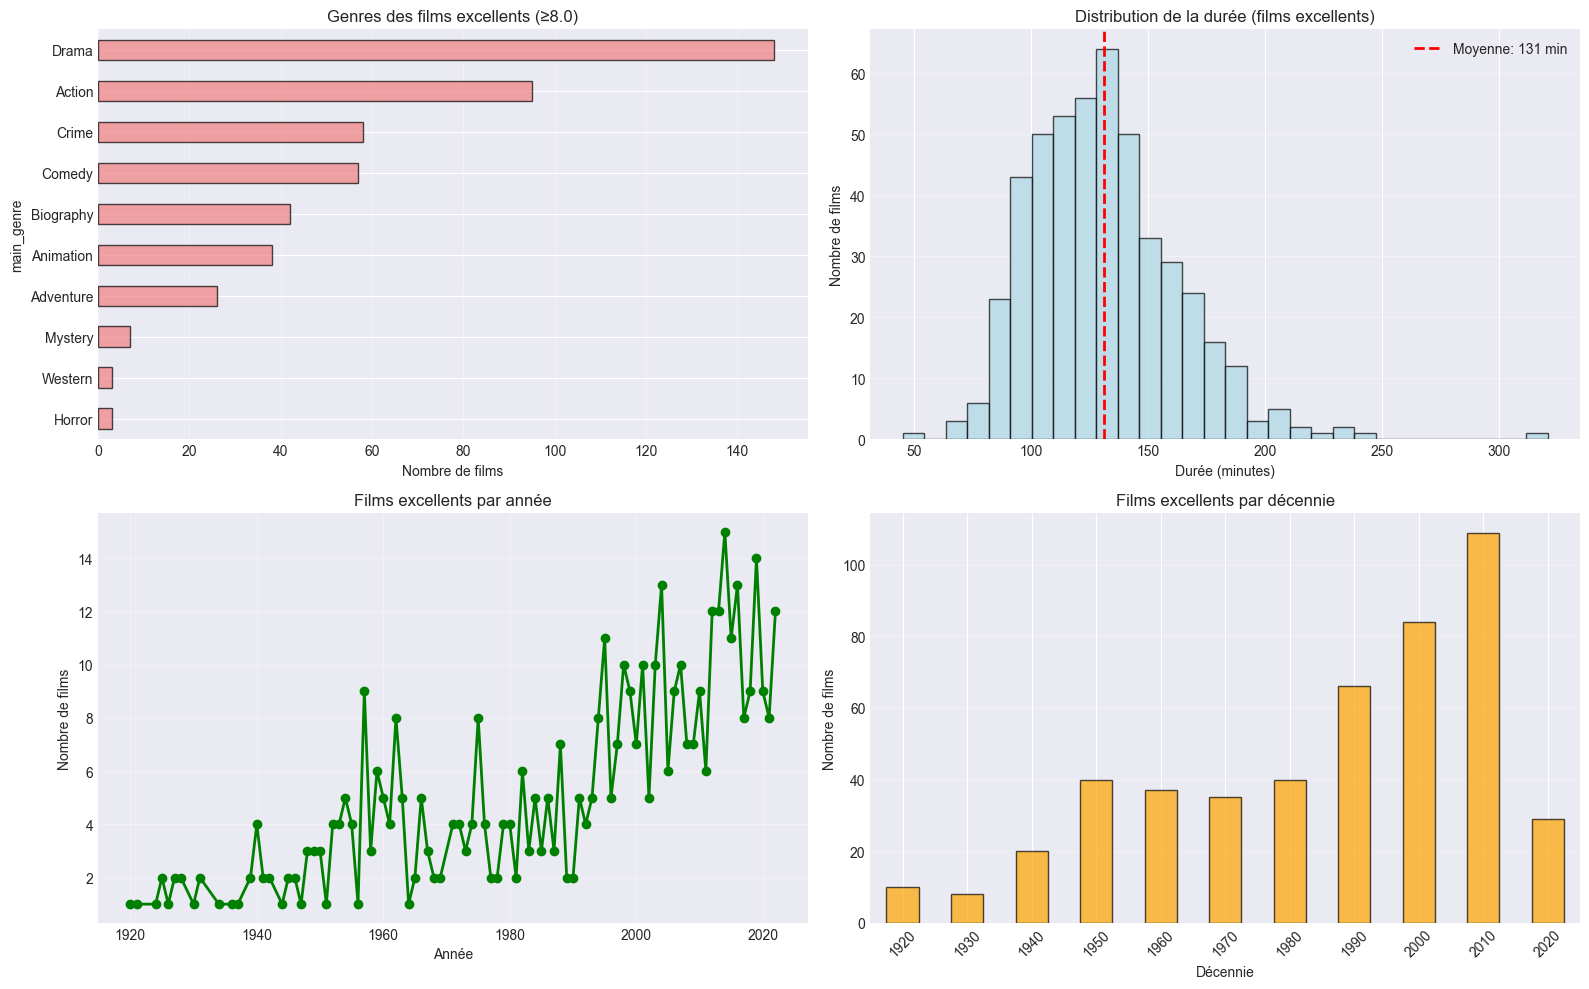

In [27]:
excellent_movies = df[df['Rating'] >= 8.0]

print(f"=== FILMS EXCELLENTS (note ≥ 8.0) : {len(excellent_movies)} films ===\n")

print("Genres principaux :")
print(excellent_movies['main_genre'].value_counts().head(10))

print(f"\nDurée moyenne : {excellent_movies['Runtime(Mins)'].mean():.0f} minutes")
print(f"Durée médiane : {excellent_movies['Runtime(Mins)'].median():.0f} minutes")


print(f"\nAnnée moyenne : {excellent_movies['Year'].mean():.0f}")
print(f"Répartition par décennie :")
print(excellent_movies['Decade'].value_counts().sort_index())

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Genre
excellent_movies['main_genre'].value_counts().head(10).plot(kind='barh', ax=axes[0, 0], 
                                                             color='lightcoral', edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Genres des films excellents (≥8.0)')
axes[0, 0].set_xlabel('Nombre de films')
axes[0, 0].invert_yaxis()
axes[0, 0].grid(axis='x', alpha=0.3)

# Durée
axes[0, 1].hist(excellent_movies['Runtime(Mins)'], bins=30, color='lightblue', edgecolor='black', alpha=0.7)
axes[0, 1].axvline(excellent_movies['Runtime(Mins)'].mean(), color='red', linestyle='--', linewidth=2, 
                   label=f"Moyenne: {excellent_movies['Runtime(Mins)'].mean():.0f} min")
axes[0, 1].set_title('Distribution de la durée (films excellents)')
axes[0, 1].set_xlabel('Durée (minutes)')
axes[0, 1].set_ylabel('Nombre de films')
axes[0, 1].legend()
axes[0, 1].grid(axis='y', alpha=0.3)

# Année
excellent_movies['Year'].value_counts().sort_index().plot(ax=axes[1, 0], color='green', linewidth=2, marker='o')
axes[1, 0].set_title('Films excellents par année')
axes[1, 0].set_xlabel('Année')
axes[1, 0].set_ylabel('Nombre de films')
axes[1, 0].grid(alpha=0.3)

# Décennie
excellent_movies['Decade'].value_counts().sort_index().plot(kind='bar', ax=axes[1, 1], 
                                                             color='orange', edgecolor='black', alpha=0.7)
axes[1, 1].set_title('Films excellents par décennie')
axes[1, 1].set_xlabel('Décennie')
axes[1, 1].set_ylabel('Nombre de films')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

Quels genres ont les meilleures notes en moyenne ?

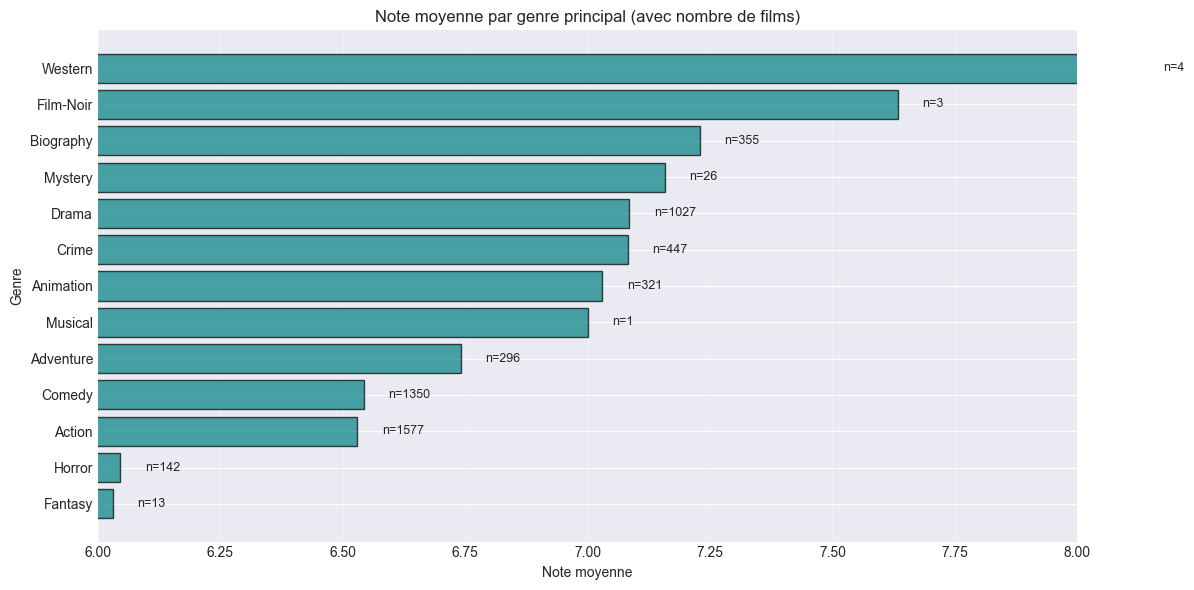

=== NOTE MOYENNE PAR GENRE ===
    Genre  Avg_Rating  Count
  Western    8.125000      4
Film-Noir    7.633333      3
Biography    7.229577    355
  Mystery    7.157692     26
    Drama    7.084907   1027
    Crime    7.081655    447
Animation    7.030218    321
  Musical    7.000000      1
Adventure    6.741216    296
   Comedy    6.543037   1350
   Action    6.529677   1577
   Horror    6.045775    142
  Fantasy    6.030769     13


In [28]:
rating_by_genre = df.groupby('main_genre').agg({
    'Rating': ['mean', 'count']
}).reset_index()
rating_by_genre.columns = ['Genre', 'Avg_Rating', 'Count']
rating_by_genre = rating_by_genre.sort_values('Avg_Rating', ascending=False)

plt.figure(figsize=(12, 6))
bars = plt.barh(rating_by_genre['Genre'], rating_by_genre['Avg_Rating'], 
                color='teal', edgecolor='black', alpha=0.7)

for i, (rating, count) in enumerate(zip(rating_by_genre['Avg_Rating'], rating_by_genre['Count'])):
    plt.text(rating + 0.05, i, f'n={count}', va='center', fontsize=9)

plt.xlabel('Note moyenne')
plt.ylabel('Genre')
plt.title('Note moyenne par genre principal (avec nombre de films)')
plt.gca().invert_yaxis()
plt.xlim(6, 8)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("=== NOTE MOYENNE PAR GENRE ===")
print(rating_by_genre.to_string(index=False))

## matrice de corrélation entre les variables numériques

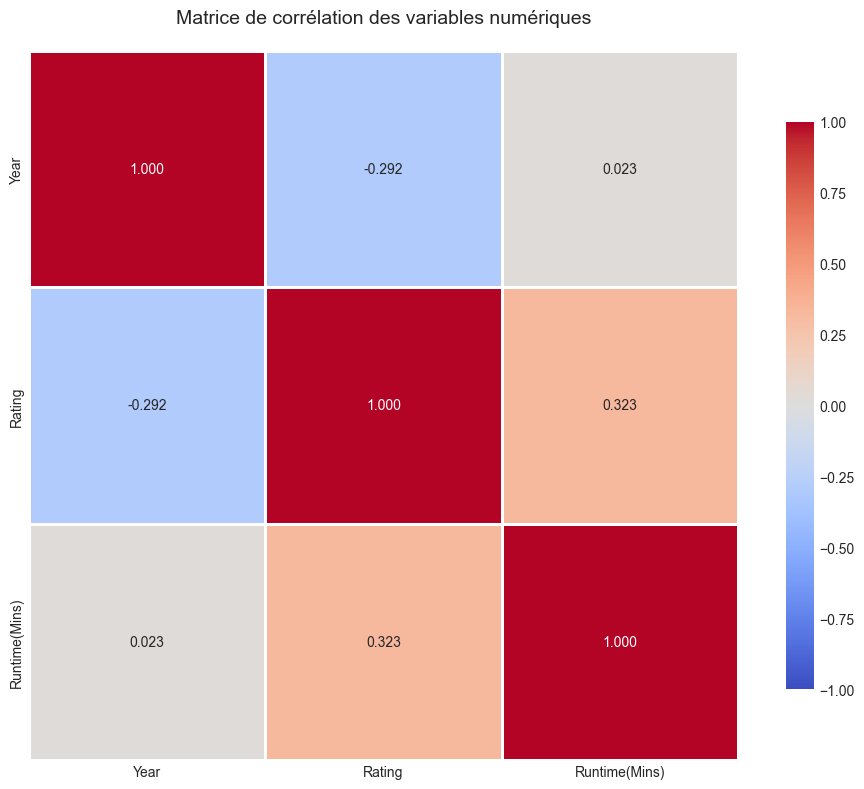

=== MATRICE DE CORRÉLATION ===
                   Year    Rating  Runtime(Mins)
Year           1.000000 -0.291711       0.022971
Rating        -0.291711  1.000000       0.323256
Runtime(Mins)  0.022971  0.323256       1.000000


In [29]:
numeric_cols = ['Year', 'Rating', 'Runtime(Mins)']
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, 
            fmt='.3f', vmin=-1, vmax=1)
plt.title('Matrice de corrélation des variables numériques', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

print("=== MATRICE DE CORRÉLATION ===")
print(correlation_matrix)

Relations entre Variables

Note moyenne par genre

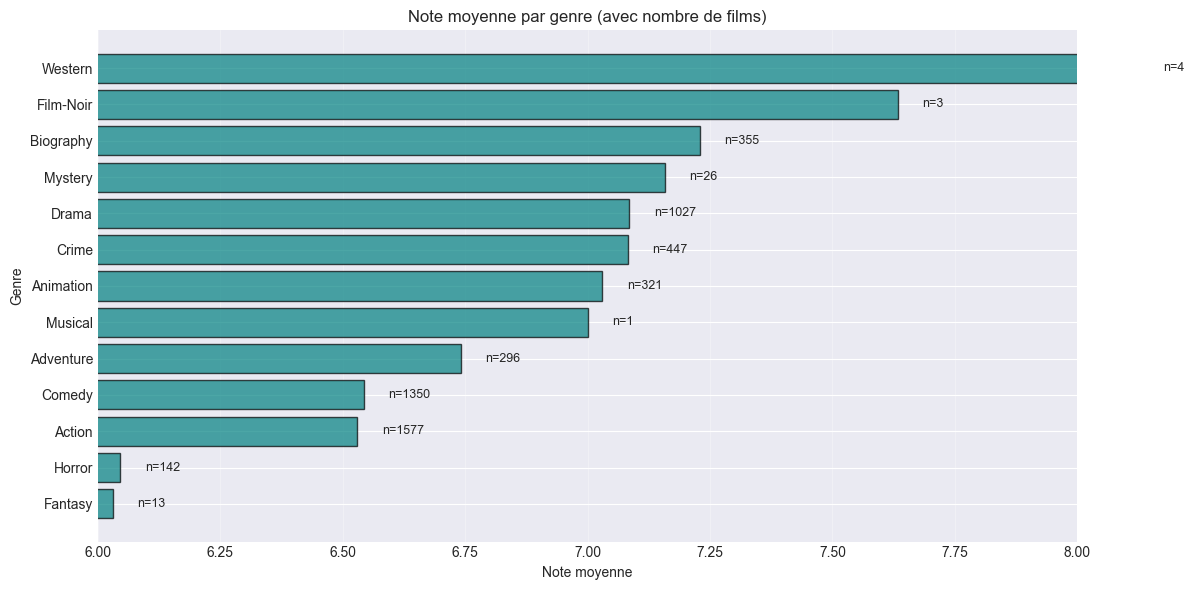

=== NOTE MOYENNE PAR GENRE ===
    Genre  Avg_Rating  Count
  Western    8.125000      4
Film-Noir    7.633333      3
Biography    7.229577    355
  Mystery    7.157692     26
    Drama    7.084907   1027
    Crime    7.081655    447
Animation    7.030218    321
  Musical    7.000000      1
Adventure    6.741216    296
   Comedy    6.543037   1350
   Action    6.529677   1577
   Horror    6.045775    142
  Fantasy    6.030769     13


In [30]:


rating_by_genre = df.groupby('main_genre').agg({
    'Rating': ['mean', 'count']
}).reset_index()
rating_by_genre.columns = ['Genre', 'Avg_Rating', 'Count']
rating_by_genre = rating_by_genre.sort_values('Avg_Rating', ascending=False)

plt.figure(figsize=(12, 6))
bars = plt.barh(rating_by_genre['Genre'], rating_by_genre['Avg_Rating'], 
                color='teal', edgecolor='black', alpha=0.7)

for i, (rating, count) in enumerate(zip(rating_by_genre['Avg_Rating'], rating_by_genre['Count'])):
    plt.text(rating + 0.05, i, f'n={count}', va='center', fontsize=9)

plt.xlabel('Note moyenne')
plt.ylabel('Genre')
plt.title('Note moyenne par genre (avec nombre de films)')
plt.gca().invert_yaxis()
plt.xlim(6, 8)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("=== NOTE MOYENNE PAR GENRE ===")
print(rating_by_genre.to_string(index=False))

Relation Durée vs Note

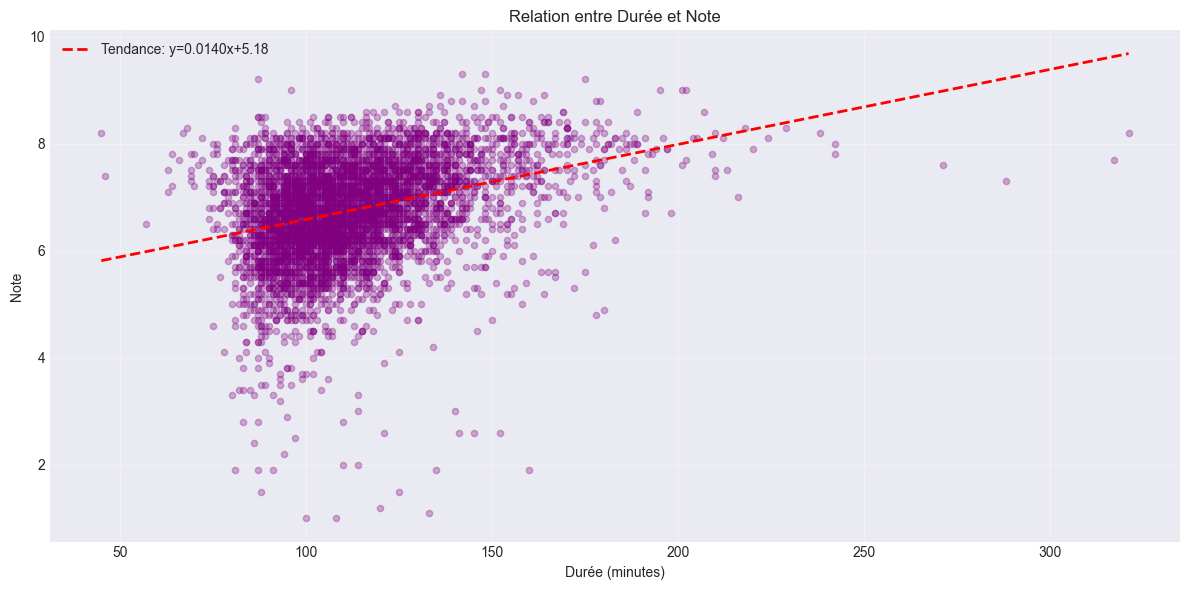

=== CORRÉLATION DURÉE-NOTE ===
Coefficient : 0.323


In [31]:
import numpy as np



plt.figure(figsize=(12, 6))
plt.scatter(df['Runtime(Mins)'], df['Rating'], alpha=0.3, s=20, color='purple')
plt.xlabel('Durée (minutes)')
plt.ylabel('Note')
plt.title('Relation entre Durée et Note')
plt.grid(alpha=0.3)


z = np.polyfit(df['Runtime(Mins)'], df['Rating'], 1)
p = np.poly1d(z)
plt.plot(df['Runtime(Mins)'].sort_values(), p(df['Runtime(Mins)'].sort_values()), 
         "r--", linewidth=2, label=f'Tendance: y={z[0]:.4f}x+{z[1]:.2f}')
plt.legend()
plt.tight_layout()
plt.show()

correlation = df['Runtime(Mins)'].corr(df['Rating'])
print(f"=== CORRÉLATION DURÉE-NOTE ===")
print(f"Coefficient : {correlation:.3f}")

### implementation d'une methode basique basée sur encodage tf-idf

In [32]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

df = pd.read_csv("Film_DataSet.csv")


# 1. Nettoyer les colonnes

print("=== PRÉPARATION DES DONNÉES ===\n")

# Nettoyer Director (enlever "Directors:")
df['Director_clean'] = df['Director'].str.replace('Directors:', '', regex=False).str.strip()

# Fonction pour nettoyer et séparer les listes
def clean_and_split(text):
    if pd.isna(text) or text.strip() == '':
        return []
    return [item.strip() for item in text.split(',')]

# Créer les listes
df['genres_list'] = (df['main_genre'] + ', ' + df['side_genre']).apply(clean_and_split)
df['actors_list'] = df['Actors'].apply(clean_and_split)
df['director_list'] = df['Director_clean'].apply(clean_and_split)

print(" Colonnes nettoyées")
print(f"Exemple de genres_list : {df['genres_list'].iloc[0]}")
print(f"Exemple d'actors_list : {df['actors_list'].iloc[0][:3]}")
print(f"Exemple de director_list : {df['director_list'].iloc[0]}")

# 2. Créer une "soupe" de features

def create_soup(row):
    """
    Combine genres, acteurs et réalisateur en une seule chaîne
    On donne plus de poids aux genres et réalisateur (on les répète)
    """
    genres = ' '.join(row['genres_list'])
    actors = ' '.join(row['actors_list'][:5])  # Max 5 acteurs
    director = ' '.join(row['director_list'])
    
    # Répéter genres et director pour leur donner plus d'importance
    return f"{genres} {genres} {director} {director} {actors}"

df['soup'] = df.apply(create_soup, axis=1)

print("\n 'Soupe' de features créée")
print(f"Exemple : {df['soup'].iloc[0][:100]}...")

# 3. Créer un index pour chaque film

# Réinitialiser l'index pour éviter les problèmes
df = df.reset_index(drop=True)

# Créer un dictionnaire titre -> index
indices = pd.Series(df.index, index=df['Movie_Title']).to_dict()

print(f"\n Index créés pour {len(df)} films")
print(f"Exemple : 'Inception' a l'index {indices.get('Inception', 'Not found')}")

print("\n=== PRÉPARATION TERMINÉE ===")

=== PRÉPARATION DES DONNÉES ===

 Colonnes nettoyées
Exemple de genres_list : ['Action', 'Adventure', 'Drama']
Exemple d'actors_list : ['Rishab Shetty', 'Sapthami Gowda', 'Kishore Kumar G.']
Exemple de director_list : ['Rishab Shetty']

 'Soupe' de features créée
Exemple : Action Adventure Drama Action Adventure Drama Rishab Shetty Rishab Shetty Rishab Shetty Sapthami Gow...

 Index créés pour 5562 films
Exemple : 'Inception' a l'index 3

=== PRÉPARATION TERMINÉE ===


In [33]:
print("=== CRÉATION DE LA MATRICE DE SIMILARITÉ ===\n")

# 1. Créer la matrice TF-IDF
print("⏳ Création de la matrice TF-IDF...")
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['soup'])

print(f"✅ Matrice TF-IDF créée : {tfidf_matrix.shape}")
print(f"   - {tfidf_matrix.shape[0]} films")
print(f"   - {tfidf_matrix.shape[1]} features uniques")

=== CRÉATION DE LA MATRICE DE SIMILARITÉ ===

⏳ Création de la matrice TF-IDF...
✅ Matrice TF-IDF créée : (5562, 11035)
   - 5562 films
   - 11035 features uniques


visualisation des films via PCA et Tsne

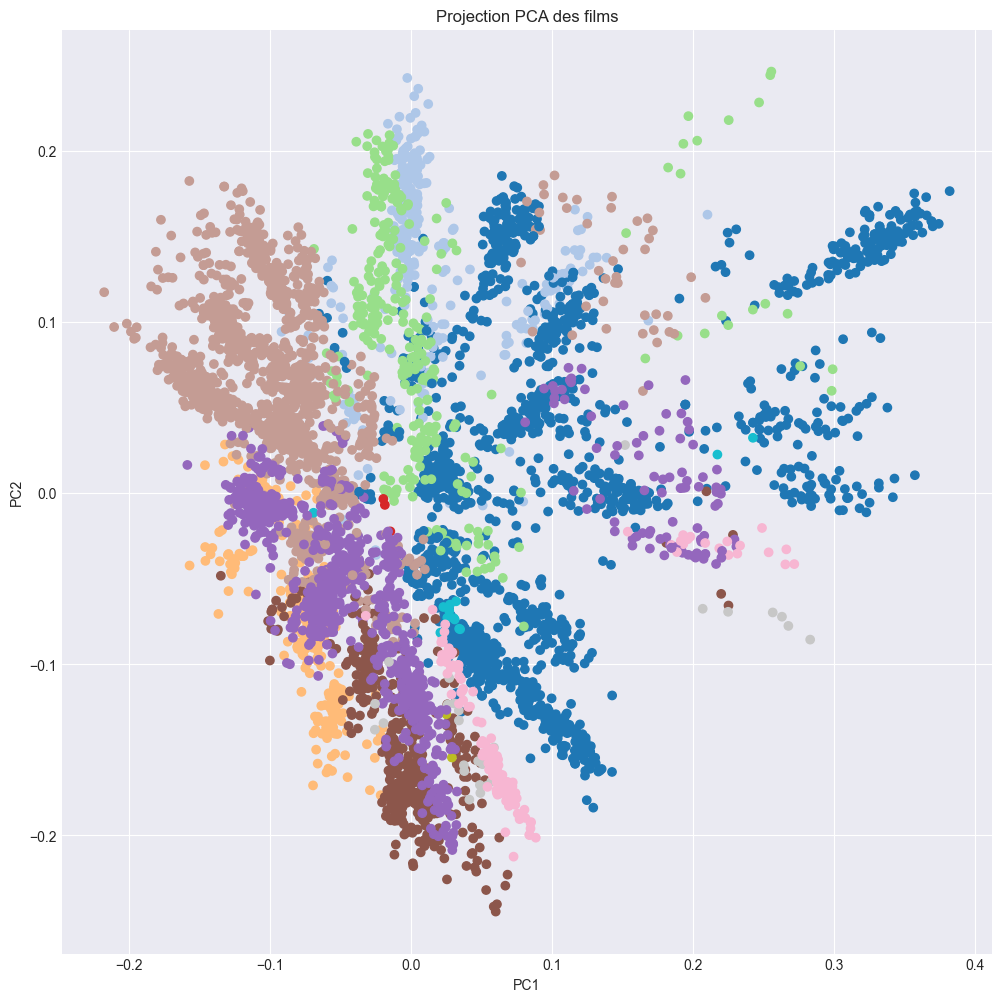

In [34]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Convertir en dense (si dataset raisonnable)
X_dense = tfidf_matrix.toarray()

pca = PCA(n_components=2)
reduced = pca.fit_transform(X_dense)

plt.figure(figsize=(12, 12))
plt.scatter(
    reduced[:, 0],
    reduced[:, 1],
    c=pd.factorize(df['main_genre'])[0],   # couleurs numériques
    cmap='tab20'
)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Projection PCA des films")
plt.show()


⏳ Running t-SNE (this may take ~30–60 seconds)...
✅ t-SNE completed!


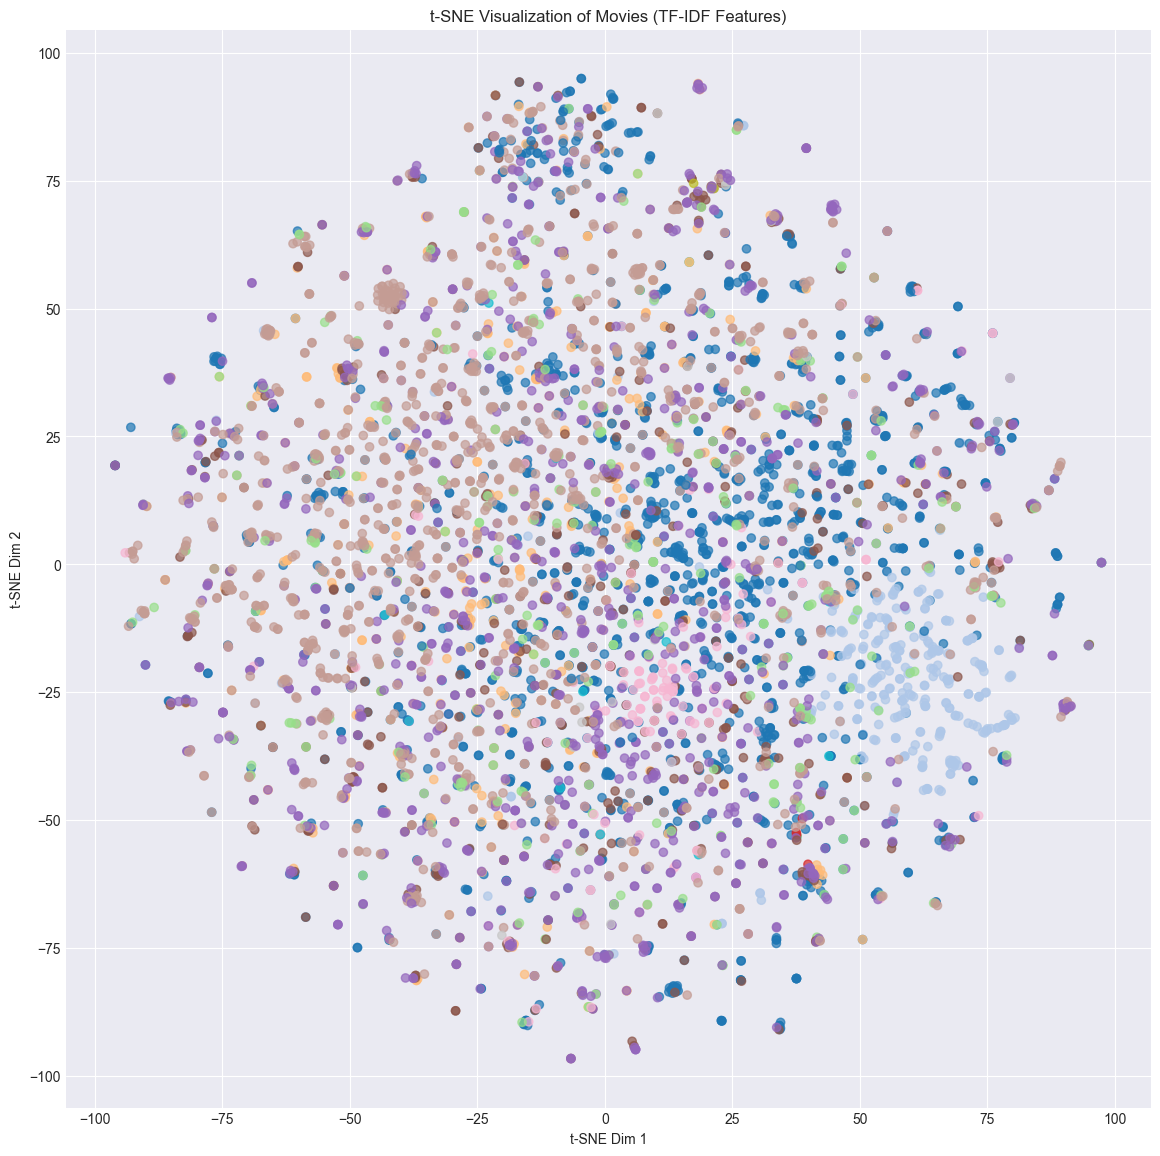

In [36]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd

# Convert sparse TF-IDF to dense (t-SNE requires dense)
X_dense = tfidf_matrix.toarray()

# Create t-SNE model
tsne = TSNE(n_components=2, perplexity=30, random_state=42)

print("⏳ Running t-SNE (this may take ~30–60 seconds)...")
reduced = tsne.fit_transform(X_dense)
print("✅ t-SNE completed!")

# Map genres to integer colors
genre_codes = pd.factorize(df['main_genre'])[0]

# Plot
plt.figure(figsize=(14, 14))
plt.scatter(
    reduced[:, 0],
    reduced[:, 1],
    c=genre_codes,
    cmap='tab20',
    alpha=0.7
)
plt.xlabel("t-SNE Dim 1")
plt.ylabel("t-SNE Dim 2")
plt.title("t-SNE Visualization of Movies (TF-IDF Features)")
plt.show()


L'analyse démontre la supériorité de l'approche linéaire (ACP) sur ces données textuelles : elle parvient à extraire une structure sémantique globale en forme d'éventail où les genres se distinguent clairement selon des axes lexicaux forts. À l'inverse, le t-SNE échoue à gérer la haute dimensionnalité et la nature creuse (sparse) des vecteurs TF-IDF bruts, produisant un nuage bruité et sans topologie cohérente.

In [ ]:
# 2. Calculer la similarité cosinus
print("\n⏳ Calcul de la similarité entre tous les films...")
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

print(f"✅ Matrice de similarité créée : {cosine_sim.shape}")
print(f"   - Chaque film est comparé aux {cosine_sim.shape[1]} autres films")

# 3. Vérifier avec un exemple
print("\n=== TEST DE SIMILARITÉ ===")
# Prenons "Inception" comme exemple
test_movie = "Inception"
if test_movie in indices:
    idx = indices[test_movie]
    
    # Récupérer les scores de similarité pour ce film
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Trier par score (du plus similaire au moins similaire)
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Afficher les 6 films les plus similaires (en excluant le film lui-même)
    print(f"\nFilms les plus similaires à '{test_movie}' :")
    for i in range(1, 6):  # On commence à 1 pour exclure le film lui-même
        movie_idx = sim_scores[i][0]
        similarity = sim_scores[i][1]
        print(f"  {i}. {df.iloc[movie_idx]['Movie_Title']} (similarité: {similarity:.3f})")
        print(f"     Genres: {df.iloc[movie_idx]['main_genre']}, {df.iloc[movie_idx]['side_genre']}")
        print(f"     Réalisateur: {df.iloc[movie_idx]['Director_clean']}\n")
else:
    print(f"❌ Film '{test_movie}' non trouvé dans le dataset")

print("=== MATRICE DE SIMILARITÉ TERMINÉE ===")


⏳ Calcul de la similarité entre tous les films...
✅ Matrice de similarité créée : (5562, 5562)
   - Chaque film est comparé aux 5562 autres films

=== TEST DE SIMILARITÉ ===

Films les plus similaires à 'Inception' :
  1. Batman Begins (similarité: 0.568)
     Genres: Action,  Crime,  Drama
     Réalisateur: Christopher Nolan

  2. Interstellar (similarité: 0.543)
     Genres: Adventure,  Drama,  Sci-Fi
     Réalisateur: Christopher Nolan

  3. The Prestige (similarité: 0.519)
     Genres: Drama,  Mystery,  Sci-Fi
     Réalisateur: Christopher Nolan

  4. Tenet (similarité: 0.508)
     Genres: Action,  Sci-Fi,  Thriller
     Réalisateur: Christopher Nolan

  5. The Dark Knight Rises (similarité: 0.455)
     Genres: Action,  Drama
     Réalisateur: Christopher Nolan

=== MATRICE DE SIMILARITÉ TERMINÉE ===


In [ ]:
import json
import numpy as np

TOP_K = 30
top_k_dict = {}

# Parcourir chaque film
for i, row in enumerate(df.itertuples(), start=1):  # start=1 pour correspondre à SQL auto-increment
    movie_id = i  # ID commence à 1
    sim_scores = list(enumerate(cosine_sim[i-1])) 
    sim_scores = [s for s in sim_scores if s[0] != i-1]  # exclure le film lui-même
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    top_k = sim_scores[:TOP_K]

    # Stocker les top-K en utilisant des IDs commençant à 1
    top_k_dict[movie_id] = [
        {"id": idx+1, "score": float(score)} 
        for idx, score in top_k
    ]

# Sauvegarder en JSON
with open("top30_similar_movies_sql_ids.json", "w", encoding="utf-8") as f:
    json.dump(top_k_dict, f, ensure_ascii=False, indent=2)

print("✅ Fichier top30_similar_movies_sql_ids.json créé !")


✅ Fichier top30_similar_movies_sql_ids.json créé !
